In [1]:
from capture_image import capture_image
import sys
import os
import warnings
import numpy as np

# add parent folder to sys.path
sys.path.insert(0, os.path.abspath(".."))

# ignore DeprecationWarning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# ignore RuntimeWarning messages
warnings.filterwarnings("ignore", category=RuntimeWarning)

from volume_estimation.src.models_1_no_vol.predict_full_pipeline import predict_no_vol
from segmentation_and_depth.src.models.predict_model import predict as predict_seg_depth
from volume_estimation.src.models_2_input_vol.predict_full_pipeline import predict_with_vol

Image saved
Path:  captured_images/20230628_144234/image.png
Predicted liquid volume: 70.42 mL


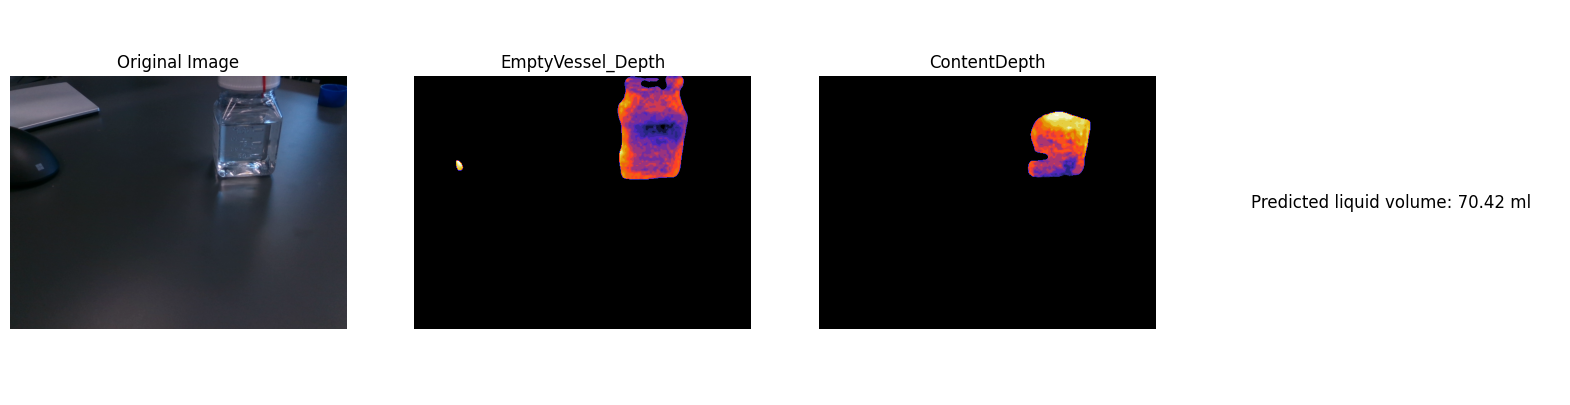

In [2]:
path = capture_image()
print("Path: ", path)
predict_no_vol(path, save_segmentation=True, save_depth=True, predict_volume=True)

In [3]:
path = "../volume_estimation/example/RGBImage.png"

torch.Size([1, 160, 214])
torch.Size([1, 160, 214])
c:\Users\apo_n\Documents\GitHub\thesis\cell_culture_automation
VolumeNet(
  (conv1): Conv2d(2, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv5): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1920, out_f

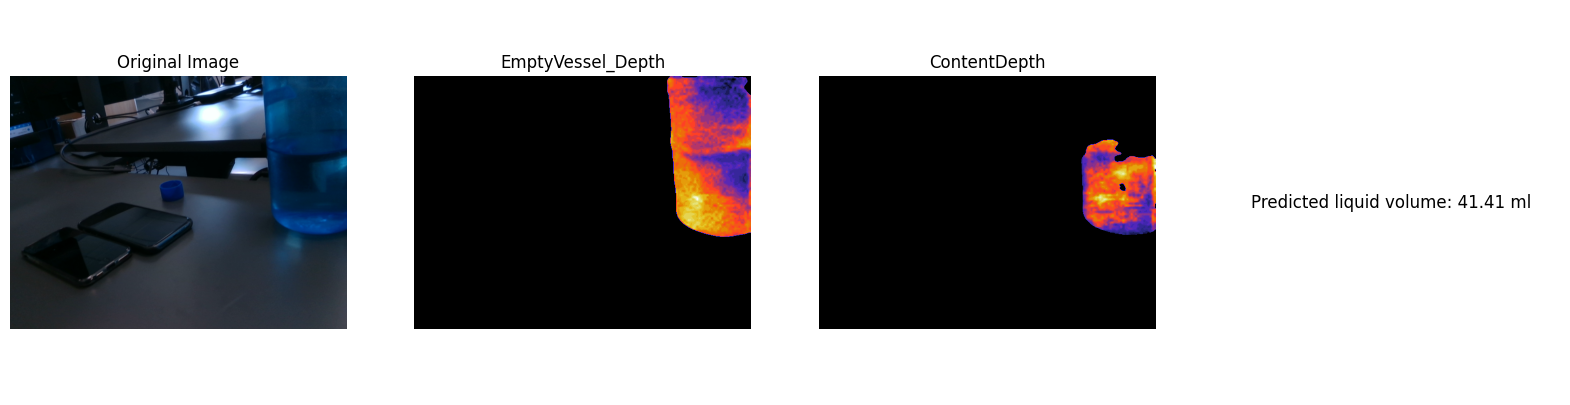

In [3]:
predict_vol.predict_no_vol(path, predict_volume=True, save_segmentation=False, save_depth=False)

Image saved
Path:  captured_images/20230628_143537/image.png
Predicted liquid volume: 4565 mL


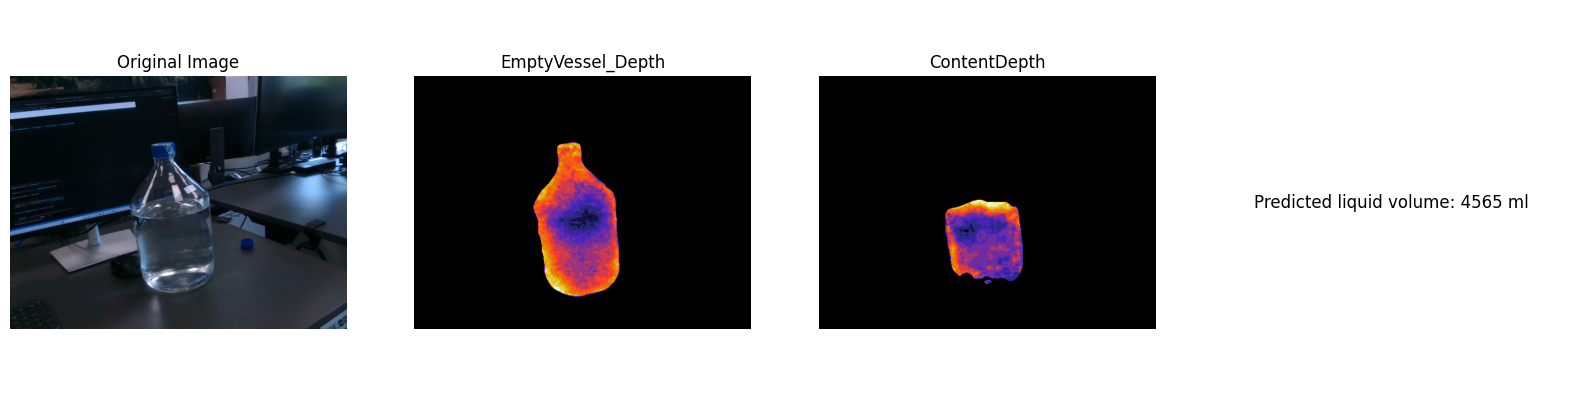

In [11]:
path = capture_image()
print("Path: ", path)
predict_with_vol(path, save_segmentation=True, save_depth=True, predict_volume=True, vessel_volume=6000)

In [7]:
# load saved segmentation map as npy file
segmentation_map_npy = np.load(path[:-4] + "_VesselOpeningMask.npy")


print("Segmentation map shape: ", segmentation_map_npy.shape)

Segmentation map shape:  (1, 480, 640)


In [8]:
# value count of segmentation map
unique, counts = np.unique(segmentation_map_npy, return_counts=True)
print("Value count of segmentation map: ", dict(zip(unique, counts)))


Value count of segmentation map:  {0: 305333, 1: 1867}


In [4]:
model_path = "../segmentation_and_depth/models/segmentation_depth_model.torch"
predict_seg_depth(model_path, path)

FileNotFoundError: [Errno 2] No such file or directory: 'output/model.txt'